In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

In [6]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
df.drop(columns=['salary','salary_currency'], inplace=True)

In [13]:
df.rename(columns={'work_year':'year','experience_level':'exp','employment_type':'emp_type',
                   'salary_in_usd':'salary','employee_residence':'emp_loc','company_location':'com_loc',
                   'company_size':'com_size'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          3755 non-null   int64 
 1   exp           3755 non-null   object
 2   emp_type      3755 non-null   object
 3   job_title     3755 non-null   object
 4   salary        3755 non-null   int64 
 5   emp_loc       3755 non-null   object
 6   remote_ratio  3755 non-null   int64 
 7   com_loc       3755 non-null   object
 8   com_size      3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB


In [15]:
df.head()

,year,exp,emp_type,job_title,salary,emp_loc,remote_ratio,com_loc,com_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [18]:
df['exp'] = df['exp'].replace({'SE':'Senior','MI':'Mid','EN':'Entry','EX':'Executive'})

In [21]:
df['emp_type'] = df['emp_type'].replace({'FT':'Full Time','CT':'Contract','PT':'Part Time','FL':'Freelance'})

In [22]:
df

,year,exp,emp_type,job_title,salary,emp_loc,remote_ratio,com_loc,com_size
0,2023,Senior,Full Time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Mid,Contract,ML Engineer,30000,US,100,US,S
2,2023,Mid,Contract,ML Engineer,25500,US,100,US,S
3,2023,Senior,Full Time,Data Scientist,175000,CA,100,CA,M
4,2023,Senior,Full Time,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full Time,Data Scientist,412000,US,100,US,L
3751,2021,Mid,Full Time,Principal Data Scientist,151000,US,100,US,L
3752,2020,Entry,Full Time,Data Scientist,105000,US,100,US,S
3753,2020,Entry,Contract,Business Data Analyst,100000,US,100,US,L


<AxesSubplot:xlabel='emp_type', ylabel='salary'>

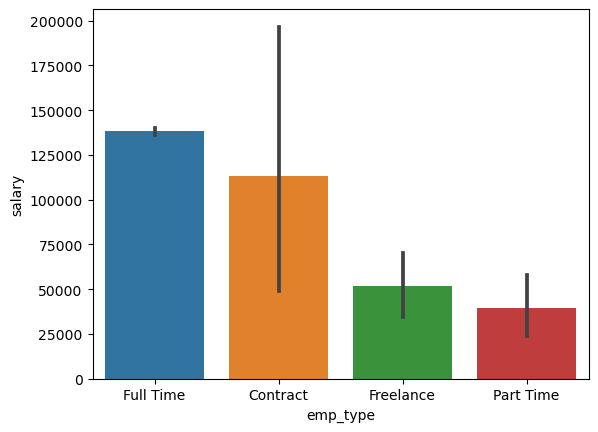

In [23]:
sns.barplot(x='emp_type', y='salary', data=df)

<AxesSubplot:xlabel='exp', ylabel='salary'>

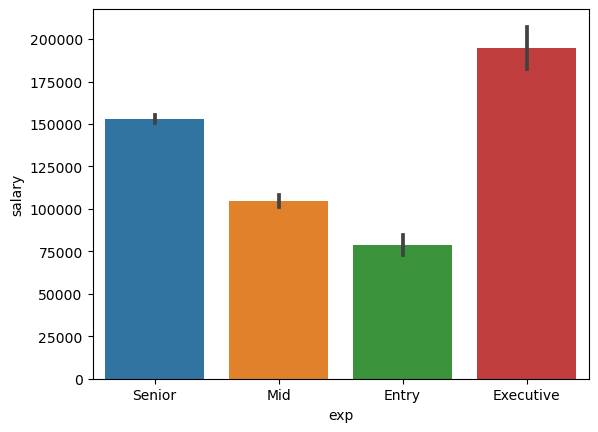

In [24]:
sns.barplot(x='exp', y='salary', data=df)

<AxesSubplot:xlabel='remote_ratio', ylabel='salary'>

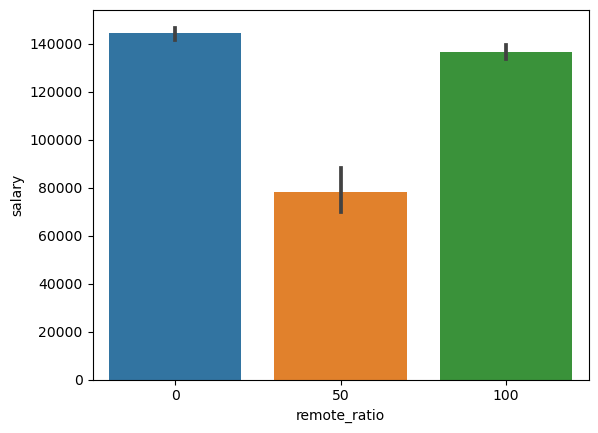

In [28]:
sns.barplot(x='remote_ratio', y='salary', data=df)

<AxesSubplot:xlabel='com_size', ylabel='salary'>

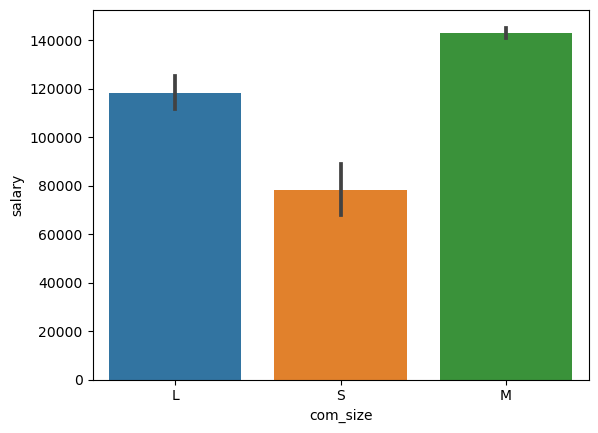

In [29]:
sns.barplot(x='com_size', y='salary', data=df)

<AxesSubplot:xlabel='year', ylabel='salary'>

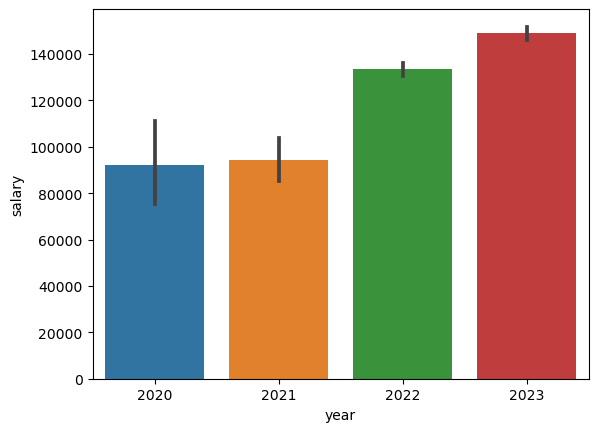

In [30]:
sns.barplot(x='year', y='salary', data=df)

In [39]:
df.groupby('emp_loc').count().sort_values(by='year', ascending=False)

,year,exp,emp_type,job_title,salary,remote_ratio,com_loc,com_size
emp_loc,,,,,,,,
US,3004,3004,3004,3004,3004,3004,3004,3004
GB,167,167,167,167,167,167,167,167
CA,85,85,85,85,85,85,85,85
ES,80,80,80,80,80,80,80,80
IN,71,71,71,71,71,71,71,71
...,...,...,...,...,...,...,...,...
LU,1,1,1,1,1,1,1,1
KW,1,1,1,1,1,1,1,1
JE,1,1,1,1,1,1,1,1


In [41]:
df[df['emp_loc']=='US']['salary'].mean()

152822.01165113182

In [42]:
df[df['emp_loc']=='US']['salary'].min()

24000

In [45]:
df[df['emp_loc']=='US']['salary'].max()

450000